<a href="https://colab.research.google.com/github/xRomory/CCADMACL_EXERCISES_COM231ML/blob/main/exercise_4b/deveraca_exercise_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [130]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [132]:
X = df.drop('target', axis=1)

In [133]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1. Perform scaling `(10 pts)`

In [134]:
scaler = StandardScaler()
X_scaled_features = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled_features, columns=X.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. Perform dimensionality reduction using PCA `(10 pts)`

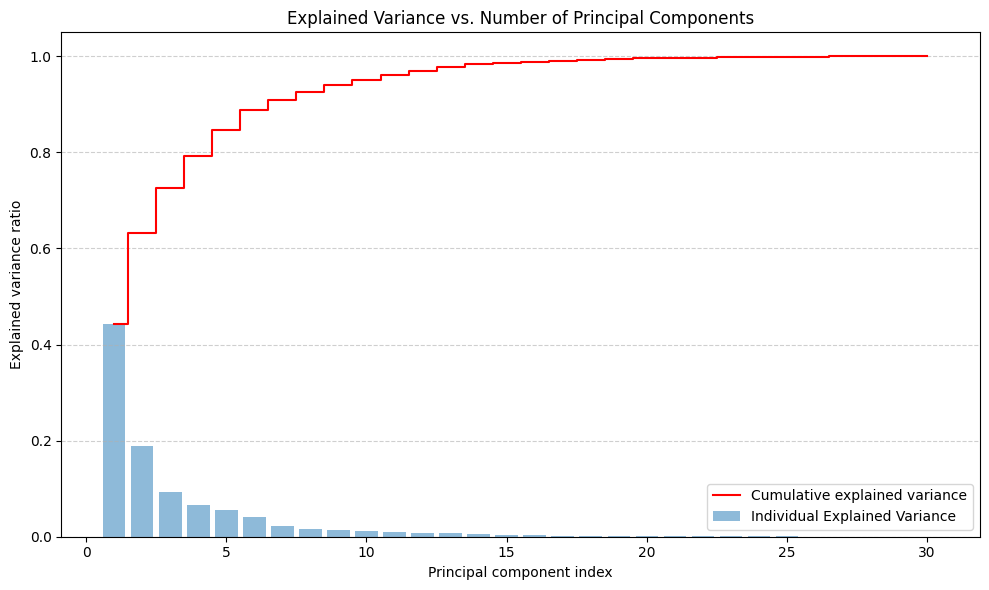

In [135]:
# Find the optimal value of n_components
pca_test = PCA()
pca_test.fit(X_scaled_features)

calculate_explained_variance = pca_test.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(calculate_explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(calculate_explained_variance) + 1),
    calculate_explained_variance,
    alpha=0.5,
    align="center",
    label="Individual Explained Variance"
)

plt.step(
    range(1, len(cum_sum_eigenvalues) + 1),
    cum_sum_eigenvalues,
    where='mid',
    label='Cumulative explained variance',
    color='red'
)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance vs. Number of Principal Components')
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [136]:
pca = PCA(n_components=3)
X_mitigated = pca.fit_transform(X_scaled_features)

3. Get the total explained variance `(5 pts)`

In [137]:
explained_variance = pca.explained_variance_ratio_

PC1_explained_variance = explained_variance[0]
print("Explained variance of PCA 1", PC1_explained_variance)

PC2_explained_variance = explained_variance[1]
print("Explained variance of PCA 2", PC2_explained_variance)

PC3_explained_variance = explained_variance[2]
print("Explained variance of PCA 3", PC3_explained_variance)

print("Total explained variance:", explained_variance.sum())

Explained variance of PCA 1 0.44272025607526366
Explained variance of PCA 2 0.18971182044033078
Explained variance of PCA 3 0.09393163257431389
Total explained variance: 0.7263637090899083


4. Plot the explained variances of each principal component `(5 pts)`

Text(0, 0.5, 'Explained Variance')

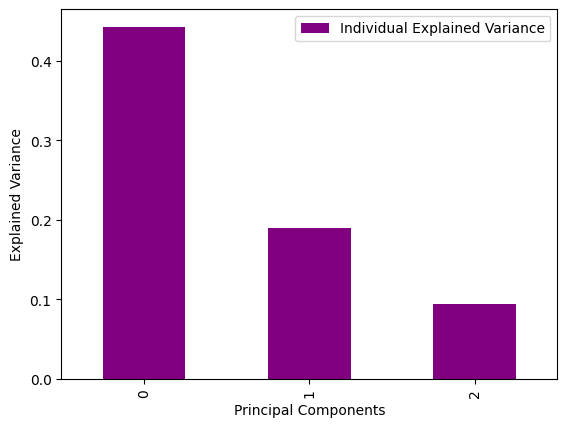

In [138]:
pd.DataFrame(explained_variance).plot.bar(color="purple")
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

In [139]:
import plotly.express as px

plot_df = pd.DataFrame({
    "PC1": X_mitigated[:, 0],
    "PC2": X_mitigated[:, 1],
    "PC3": X_mitigated[:, 2],
    "target": df["target"],
})

fig = px.scatter_3d(
    plot_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="target",
    title="PCA: 3D Scatter Plot",
    opacity=1,
)

fig.update_traces(marker=dict(size=4))

fig.show()

6. Perform clustering using any clustering algorithm `(10 pts)`

In [140]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_mitigated)

KMeans(n_clusters=2, random_state=42)

In [141]:
labels = k_means.labels_
centroids = k_means.cluster_centers_

In [142]:
import plotly.graph_objects as go

df_plot = pd.DataFrame({
    "PC1": X_mitigated[:, 0],
    "PC2": X_mitigated[:, 1],
    "PC3": X_mitigated[:, 2],
    "label": labels,
})

fig = px.scatter_3d(
    plot_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="target",
    opacity=1,
)

fig.add_traces(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode="markers",
        marker=dict(
            size=6,
            color="pink",
            symbol="x"
        ),
        name="Centroids"
    )
)

fig.update_traces(marker=dict(size=4), selector=dict(mode="markers"))

fig.update_layout(
    title="PCA: KMeans Scatter Plot",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    )
)

fig.show()

7. View the loading scores of each principal component `(5 pts)`

In [143]:
loading_score = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loading_score, columns=[f"PC{i+1}" for i in range(pca.n_components_)], index=scaled_df.columns)
loadings_df

,PC1,PC2,PC3
mean radius,0.798469,-0.558394,-0.014334
mean texture,0.378346,-0.142564,0.108454
mean perimeter,0.829965,-0.513800,-0.015649
mean area,0.806101,-0.551755,0.048220
mean smoothness,0.520110,0.444392,-0.175226
mean compactness,0.872817,0.362680,-0.124485
mean concavity,0.942542,0.143660,0.004593
mean concave points,0.951490,-0.083016,-0.042951
mean symmetry,0.503978,0.454506,-0.067609
mean fractal dimension,0.234772,0.875292,-0.037928


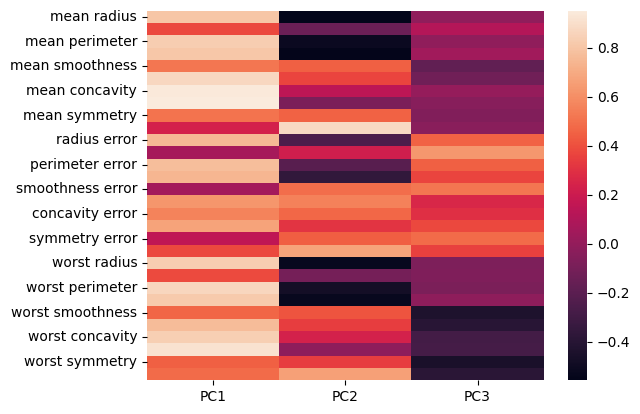

In [144]:
# Heat map
sns.heatmap(loadings_df)
plt.show()